In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [ ]:
# Load CSV data into a DataFrame
movie_data = pd.read_csv('/content/movies.csv')

In [ ]:
# Display the first few rows
print(movie_data.head())

                       movie_title release_date      genre mpaa_rating  \
0  Snow White and the Seven Dwarfs   1937-12-21    Musical           G   
1                        Pinocchio   1940-02-09  Adventure           G   
2                         Fantasia   1940-11-13    Musical           G   
3                Song of the South   1946-11-12  Adventure           G   
4                       Cinderella   1950-02-15      Drama           G   

   total_gross  inflation_adjusted_gross  
0    184925485                5228953251  
1     84300000                2188229052  
2     83320000                2187090808  
3     65000000                1078510579  
4     85000000                 920608730  


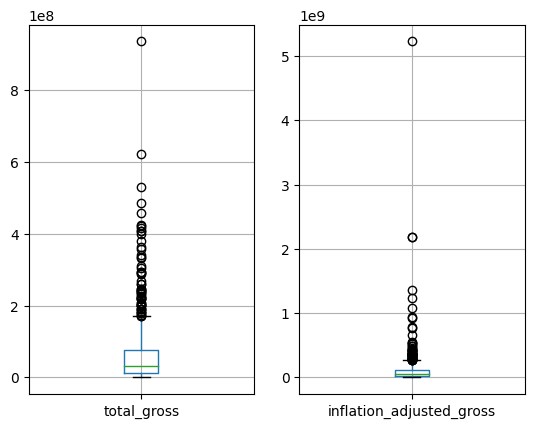

In [ ]:
# Plotting numerical fields using boxplots
fig, axes = plt.subplots(1, 2)  # Sets up a 1x2 grid for subplots
for col in movie_data.columns[:6]:
    if np.issubdtype(movie_data[col].dtype, np.number):
        movie_data.boxplot(column=col, ax=axes[movie_data.columns.get_loc(col) % 2])
plt.show()

* Preprocessing
1. Dropping rows with missing values in 'genre'

In [ ]:
# Pre-Processing
# Dropping rows with missing values in 'genre'
movie_data = movie_data.dropna(subset=['genre'])

In [ ]:
# Replacing empty values in 'mpaa_rating' with 'Not Rated'
default_rating = "Not Rated"
movie_data['mpaa_rating'].replace("", default_rating, inplace=True)

In [ ]:
# Data transformation
# Formatting 'release_date' into year-month-date format
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'], format="%Y-%m-%d")

In [ ]:
# Removing duplicate rows based on 'movie_title', 'release_date', 'genre'
movie_data = movie_data.drop_duplicates(subset=['movie_title', 'release_date', 'genre'])

In [ ]:
# Date to day conversion and creating a new column 'day_of_week'
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])
movie_data['day_of_week'] = movie_data['release_date'].dt.day_name()

In [ ]:
# Function to count outliers using IQR method
def count_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    outliers = len(column[(column < (q1 - 1.5 * iqr)) | (column > (q3 + 1.5 * iqr))])
    return outliers

outlier_counts = movie_data.select_dtypes(include=np.number).apply(count_outliers)
print(outlier_counts)

total_gross                 53
inflation_adjusted_gross    53
dtype: int64


In [ ]:
# Writing the preprocessed data to another CSV
movie_data.to_csv('preprocessed.csv', index=False)

In [ ]:
# Group data by genre and calculate total income
genre_income = movie_data.groupby('genre')['inflation_adjusted_gross'].sum().reset_index()

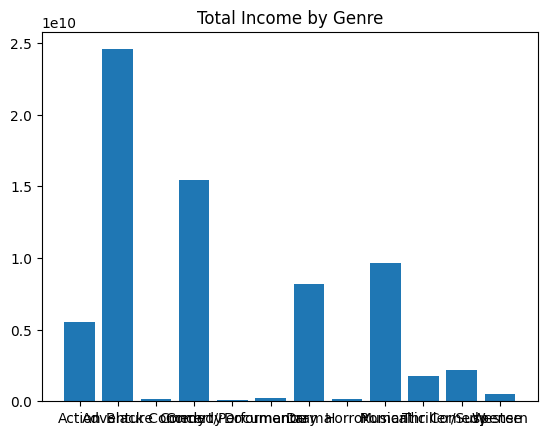

In [ ]:
# Visualizing results
plt.bar(genre_income['genre'], genre_income['inflation_adjusted_gross'])
plt.title('Total Income by Genre')
plt.show()

In [ ]:
# Printing Genre with maximum income and finding the day with highest gross income
max_genre = genre_income.loc[genre_income['inflation_adjusted_gross'].idxmax()]
print("Genre with the maximum income:", max_genre['genre'])
print("Maximum income:", max_genre['inflation_adjusted_gross'])

Genre with the maximum income: Adventure
Maximum income: 24561266158


In [ ]:
day_with_highest_income = movie_data.groupby('day_of_week')['total_gross'].sum().idxmax()
print("The day with the highest gross income is:", day_with_highest_income)

The day with the highest gross income is: Friday


In [ ]:
# Calculate Spearman correlation coefficient
spearman_corr, _ = spearmanr(pd.Categorical(movie_data['day_of_week'], categories=
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']), movie_data['total_gross'])
print("Spearman correlation coefficient (rho):", spearman_corr)

Spearman correlation coefficient (rho): 0.14851176235444136


In [ ]:
# Calculate Spearman correlation coefficient
rho, _ = spearmanr(movie_data['day_of_week'], movie_data['total_gross'])
print(f"Spearman correlation coefficient (rho): {rho}")

Spearman correlation coefficient (rho): 0.14851176235444136


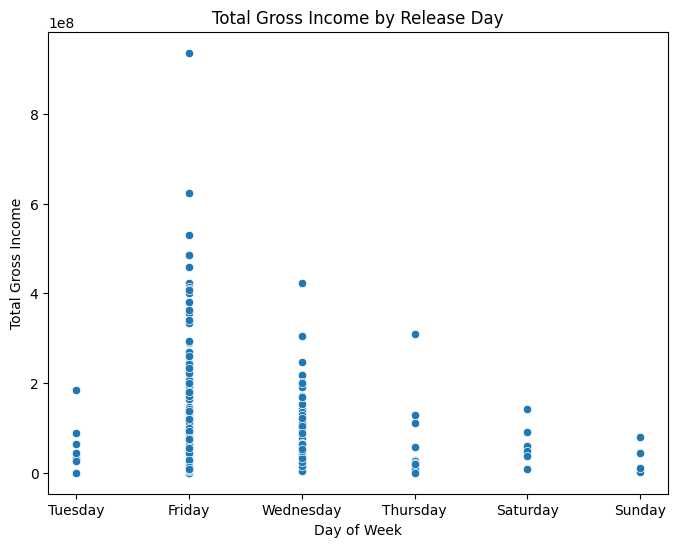

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='day_of_week', y='total_gross', data=movie_data)
plt.title('Total Gross Income by Release Day')
plt.xlabel('Day of Week')
plt.ylabel('Total Gross Income')
plt.show()

In [ ]:
# Calculate t-statistic
n = len(movie_data)
df = n - 2
alpha = 0.05

t_statistic = rho * np.sqrt((n - 2) / (1 - rho**2))

In [ ]:
# Find the critical value from the t-distribution table
from scipy.stats import t

critical_value = t.ppf(1 - alpha/2, df)

print(f"t-statistic: {t_statistic}")
print(f"Critical value: {critical_value}")

t-statistic: 3.553839540761257
Critical value: 1.9642091980498397


In [ ]:
# Compare the test statistic and critical value
if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis. There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation.")

Reject the null hypothesis. There is a significant correlation.


In [ ]:
# Calculate the squared value of the Spearman correlation coefficient
rho_squared = rho**2

print(f"Squared Spearman correlation coefficient (rho^2): {rho_squared}")

Squared Spearman correlation coefficient (rho^2): 0.022055743557622066


In [ ]:
# Generate summary statistics for numerical variables
print(movie_data.describe())

        total_gross  inflation_adjusted_gross
count  5.620000e+02              5.620000e+02
mean   6.644891e+07              1.217009e+08
std    9.384227e+07              2.898131e+08
min    0.000000e+00              0.000000e+00
25%    1.417648e+07              2.447928e+07
50%    3.201474e+07              5.627863e+07
75%    7.792766e+07              1.224108e+08
max    9.366622e+08              5.228953e+09


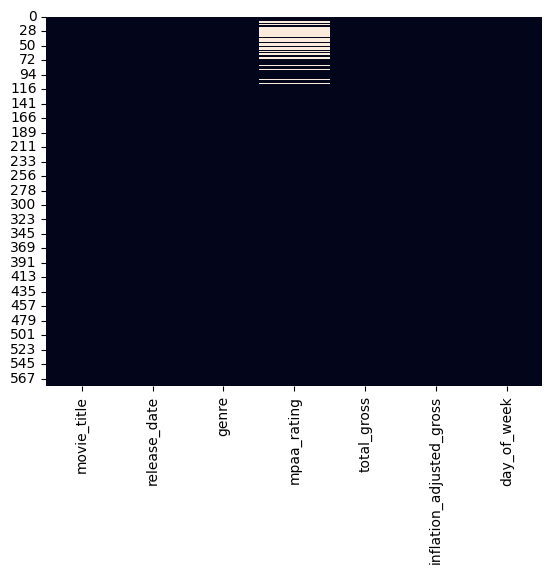

In [ ]:
# Visualize missing values
sns.heatmap(movie_data.isnull(), cbar=False)
plt.show()

<ipython-input-31-aaefd821302a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movie_data.corr(), annot=True, cmap='coolwarm')


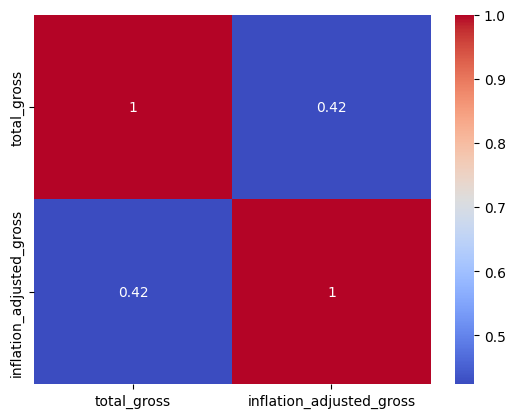

In [ ]:
# Visualize correlation matrix
sns.heatmap(movie_data.corr(), annot=True, cmap='coolwarm')
plt.show()

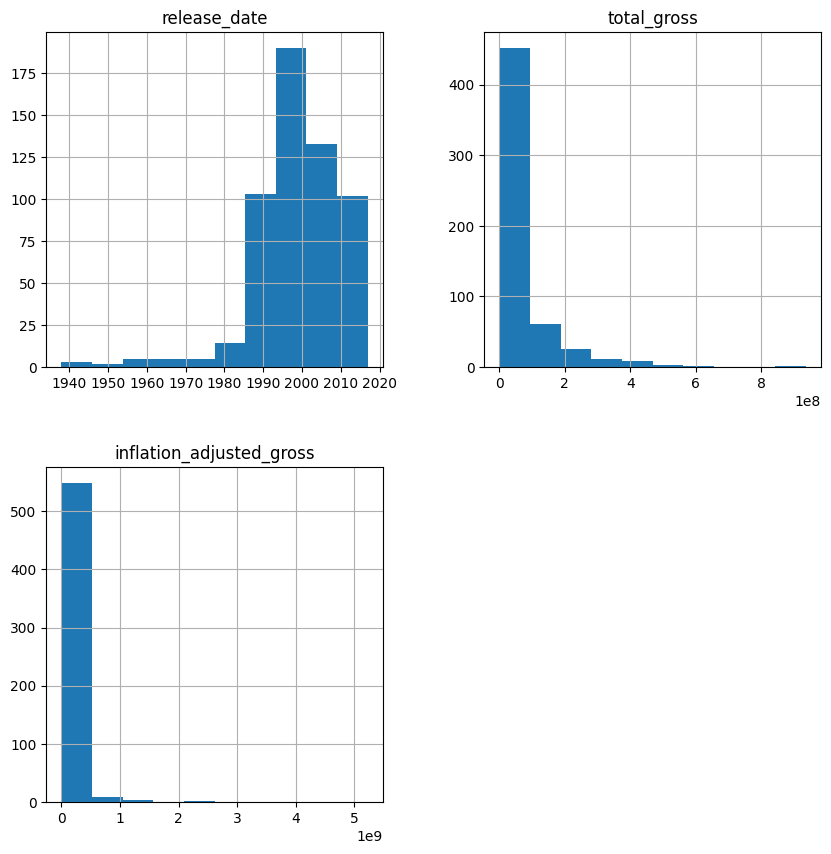

In [ ]:
# Plot histograms for numerical variables
movie_data.hist(figsize=(10,10))
plt.show()

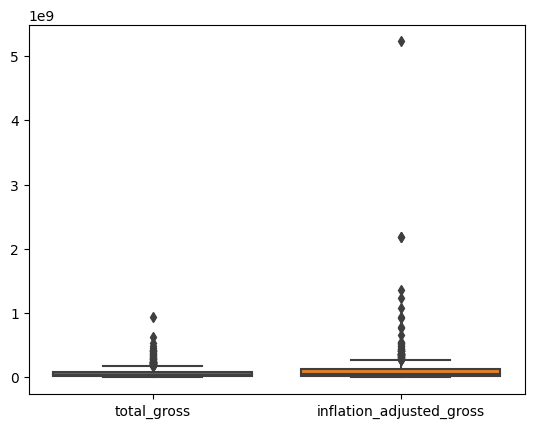

In [ ]:
# Create boxplots for numerical variables
sns.boxplot(data=movie_data)
plt.show()

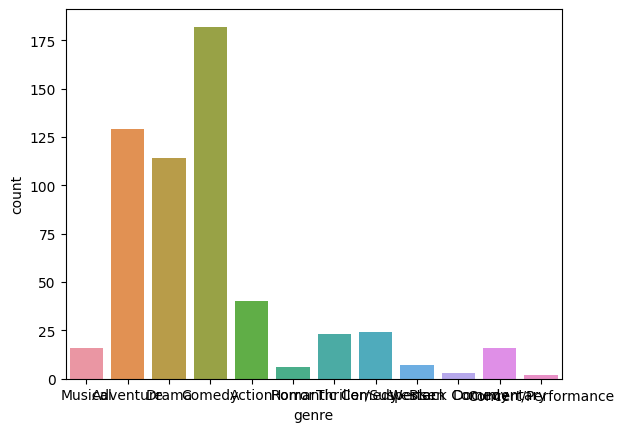

In [ ]:
# Visualize the distribution of categories
sns.countplot(x='genre', data=movie_data)
plt.show()